### Import Required Libraries
Import the necessary libraries, including NumPy, pandas, sklearn, seaborn, and matplotlib.

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Set Random Seed
Set the random seed for reproducibility using np.random.seed().

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

### Generate Dummy Data
Generate dummy data for independent and dependent variables.

In [3]:
# Generate dummy data
n = 18  # Number of datapoints
x = np.linspace(2, 12, n)  # Independent variable
y = 0.2 * x**2 + np.random.normal(0, 2, n)  # Dependent variable with Gaussian noise

### Create a DataFrame
Create a DataFrame using pandas and rename the columns.

In [4]:
# Create a DataFrame
data = pd.DataFrame({'Depth (m)': x, 'Pressure (MPa)': y})  # Rename columns here with correct units

# Display the first few rows of the DataFrame
data.head()

,Depth (m),Pressure (MPa)
0,2.000000,1.793428
1,2.588235,1.063264
2,3.176471,3.313370
3,3.764706,5.880662
4,4.352941,3.321313


### Plot the Data
Plot the data using matplotlib.

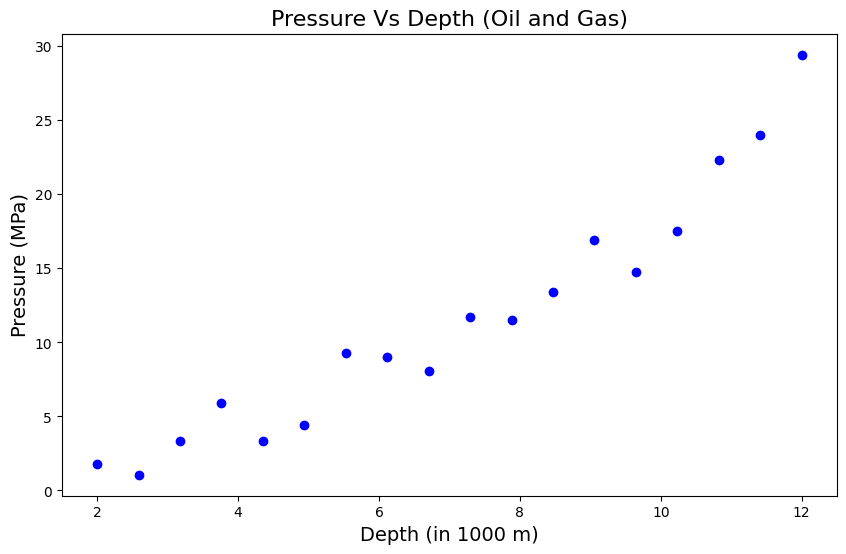

In [5]:
# Plot the data
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(data['Depth (m)'], data['Pressure (MPa)'], color='blue')  # Plot the data points
plt.xlabel('Depth (in 1000 m)', fontsize=14)  # Set the x-axis label
plt.ylabel('Pressure (MPa)', fontsize=14)  # Set the y-axis label
plt.title('Pressure Vs Depth (Oil and Gas)', fontsize=16)  # Set the title
plt.show()  # Display the plot

### Define Train-Test Split Function
Define a function to split the data into training and testing sets.

In [6]:
def ordered_train_test_split(X, y, test_size=0.2, random_state=None):
    # Set the random seed for reproducibility
    np.random.seed(random_state)
    
    # Calculate the total number of samples
    total_samples = len(X)
    
    # Calculate the number of test samples
    test_samples = int(total_samples * test_size)
    
    # Randomly select test indices without replacement
    test_indices = sorted(np.random.choice(np.arange(total_samples), size=test_samples, replace=False))
    
    # Get the remaining indices for training data
    train_indices = sorted(list(set(range(total_samples)) - set(test_indices)))
    
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Return the training and testing data
    return X_train, X_test, y_train, y_test

### Split the Data
Use the function to split the data.

In [7]:
# Use the function to split your data
X_train, X_test, y_train, y_test = ordered_train_test_split(data[['Depth (m)']], data['Pressure (MPa)'], test_size=0.4, random_state=42)

### Plot Train and Test Data
Plot the training and testing data.

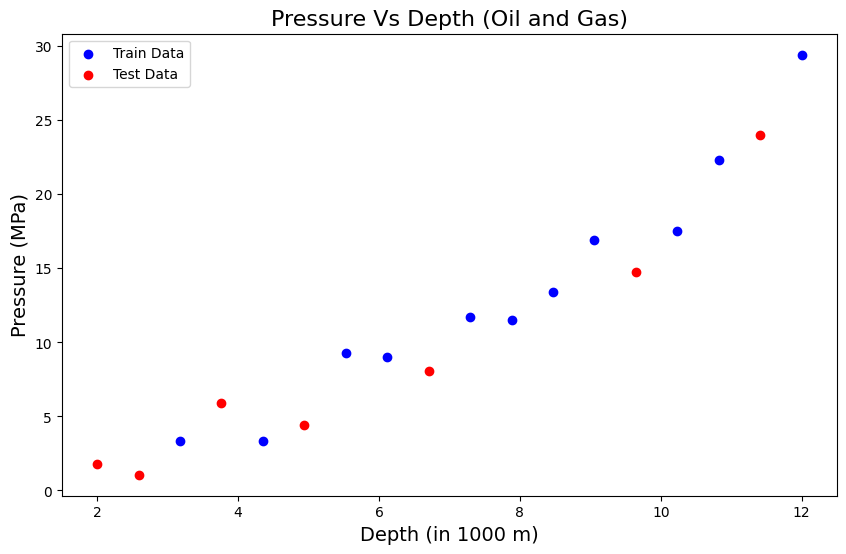

In [8]:
# Plot the train and test data points
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(X_train, y_train, color='blue', label='Train Data')  # Plot the training data points
plt.scatter(X_test, y_test, color='red', label='Test Data')  # Plot the testing data points
plt.xlabel('Depth (in 1000 m)', fontsize=14)  # Set the x-axis label
plt.ylabel('Pressure (MPa)', fontsize=14)  # Set the y-axis label
plt.title('Pressure Vs Depth (Oil and Gas)', fontsize=16)  # Set the title
plt.legend()  # Add a legend
plt.show()  # Display the plot

### Fit a Polynomial Regression Model
Fit a polynomial regression model with 2 degrees on the training data.

In [9]:
# Fit a polynomial regression model with 2 degrees on the train data
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train[['Depth (m)']])
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

### Plot the Polynomial Regression Model
Plot the polynomial regression model and the real value for a specific depth.

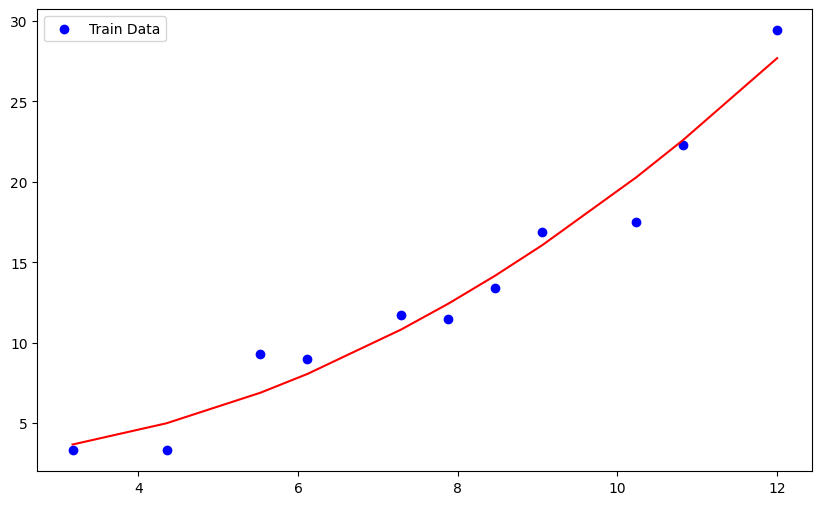

In [10]:
# Predict the y values for the training data
y_poly_pred = poly_model.predict(X_train_poly)

# Choose a specific depth
depth = 7

# Transform the depth value to polynomial features
depth_poly = poly_features.transform([[depth]])

# Predict the pressure for the specific depth
pressure_pred_poly = poly_model.predict(depth_poly)

# Plot the polynomial regression model
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(X_train, y_train, color='blue', label='Train Data')  # Plot the training data points
plt.plot(X_train, y_poly_pred, color='red')  # Plot the polynomial regression model
plt.legend()

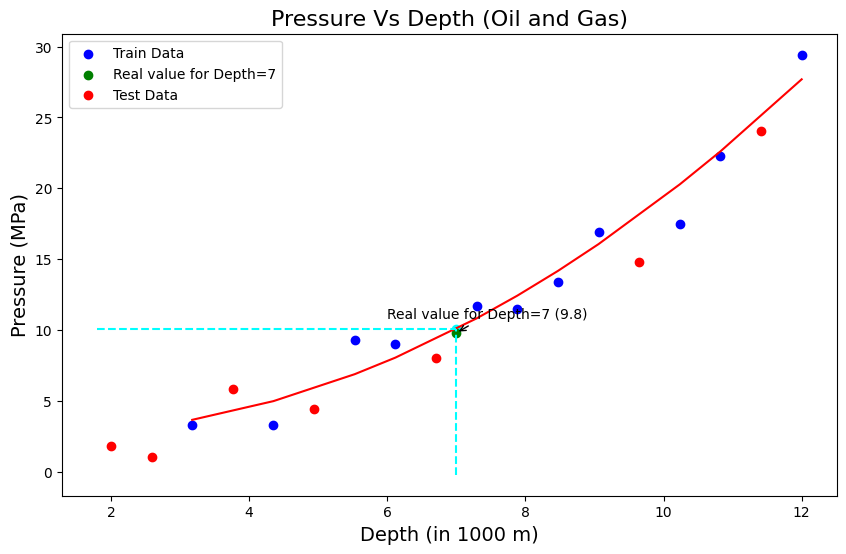

In [11]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(X_train, y_train, color='blue', label='Train Data')  # Plot the training data points
plt.plot(X_train, y_poly_pred, color='red')  # Plot the polynomial regression model

plt.scatter(depth, pressure_pred_poly, color='cyan')  # Plot the predicted pressure for the specific depth
# Calculate the real value for the specific depth
depth7real = 0.2 * 7**2
plt.scatter(depth, depth7real, color='green', label='Real value for Depth=7')  # Plot the real value for the specific depth

# Annotate the real value for the specific depth
plt.annotate('Real value for Depth=7 (9.8)', xy=(depth, depth7real), xytext=(depth-1, depth7real+1), arrowprops=dict(facecolor='black', arrowstyle='->'))

# Plot the test data points
plt.scatter(X_test, y_test, color='red', label='Test Data')

# Plot the dashed lines for the predicted pressure
plt.plot([depth, depth], [-0.2, float(pressure_pred_poly)], color='cyan', linestyle='dashed')
plt.plot([1.8, depth], [pressure_pred_poly, pressure_pred_poly], color='cyan', linestyle='dashed')

# Set the labels and the title
plt.xlabel('Depth (in 1000 m)', fontsize=14)
plt.ylabel('Pressure (MPa)', fontsize=14)
plt.title('Pressure Vs Depth (Oil and Gas)', fontsize=16)

# Add a legend
plt.legend()

# Display the plot
plt.show()

### Calculate Predictions and Error on Train Data
Calculate predictions and error on the training data.

In [12]:
# Calculate predictions on train data
X_train_poly = poly_features.transform(X_train[['Depth (m)']])
y_train_pred = poly_model.predict(X_train_poly)

# Calculate mean squared error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate root mean squared error (RMSE)
rmse_train = np.sqrt(mse_train)

# Calculate mean absolute error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)

print("Mean Squared Error (MSE) on train data:", mse_train)
print("Root Mean Squared Error (RMSE) on train data:", rmse_train)
print("Mean Absolute Error (MAE) on train data:", mae_train)

Mean Squared Error (MSE) on train data: 2.116332913763794
Root Mean Squared Error (RMSE) on train data: 1.4547621502375547
Mean Absolute Error (MAE) on train data: 1.2367837882198207


### Calculate Predictions on Test Data
Calculate predictions on the testing data.

In [13]:
# Transform the test data to polynomial features
X_test_poly = poly_features.transform(X_test[['Depth (m)']])

# Calculate predictions on test data
y_test_pred = poly_model.predict(X_test_poly)

# Calculate mean squared error (MSE) on test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error (RMSE) on test data
rmse_test = np.sqrt(mse_test)

# Calculate mean absolute error (MAE) on test data
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Mean Squared Error (MSE) on train data:", mse_test)
print("Root Mean Squared Error (RMSE) on train data:", rmse_test)
print("Mean Absolute Error (MAE) on train data:", mae_test)

Mean Squared Error (MSE) on train data: 3.5112776080636254
Root Mean Squared Error (RMSE) on train data: 1.8738403368653438
Mean Absolute Error (MAE) on train data: 1.7243135070931577
